## Psychiatric Disorders Classification Using Machine Learning

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#import mne
import matplotlib.style
import os
import pickle
from functools import partial
from math import ceil
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report)
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('./data/final_dataset_all_no_coh_train.csv')

In [4]:
df.head()

,delta.FP1,delta.FP2,delta.F7,delta.F3,delta.Fz,delta.F4,delta.F8,delta.T3,delta.C3,delta.Cz,...,gamma.C4,gamma.T4,gamma.T5,gamma.P3,gamma.Pz,gamma.P4,gamma.T6,gamma.O1,gamma.O2,main.disorder
0,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,...,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143,Addictive disorder
1,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,...,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618,Addictive disorder
2,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,...,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403,Addictive disorder
3,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,...,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860,Addictive disorder
4,13.482096,14.095855,12.854630,11.727480,13.128924,11.627138,14.978119,6.899770,9.751346,14.141171,...,2.780522,5.419482,2.587215,1.694676,1.748525,1.527331,1.664579,1.266546,1.133410,Addictive disorder


**Pre-processing for machine learning**

    - Drop unique columns (separation column, no. and eeg.date)
    - Encode categorical variable sex and targets (main.disorder and specific.disorder)
    - Save targets and drop them from feature set
    - Perform logarithmic transformation of numeric columns, except education and IQ)
    - Split data into train and test subset
    - Scale train and test data

In [5]:
# Prepare for encoding
cat_vars = ['main.disorder']
X = df.copy(deep=True)

# columns for log transformation

logtrans_cols = X.columns

#Encode categorical variables (target columns and sex)
enc = OrdinalEncoder()
X[cat_vars] = enc.fit_transform(X[cat_vars])

# Save targets
md_target = X['main.disorder']

# Drop targets
X.drop(['main.disorder'], axis=1, inplace=True)

# Perform logarithmic transformation on all data
logtrans_cols = X.columns
X[logtrans_cols] = np.log(X[logtrans_cols])

# save features' names
feature_names = X.columns
y =md_target
# main.disorder
#Xmd_train, Xmd_test, Ymd_train, Ymd_test = train_test_split(X, md_target, test_size=0.33, random_state=999)

# Scale features
# main.disorder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xmd_train = pd.DataFrame(scaler.fit_transform(X),columns=feature_names)

In [6]:
test_df = pd.read_csv('./data/final_dataset_all_no_coh_test.csv')

In [7]:
cat_vars = ['main.disorder']
X_test = test_df.copy(deep=True)

# columns for log transformation

logtrans_cols = X.columns
# Encode categorical variables (target columns and sex)
enc = OrdinalEncoder()
test_df[cat_vars] = enc.fit_transform(test_df[cat_vars])

# Save targets
md_target = test_df['main.disorder']

# Drop targets
test_df.drop(['main.disorder'], axis=1, inplace=True)

# save features' names
feature_names = test_df.columns
y_test =md_target
X_test = test_df

**Cross-validation**

**Algorithms to consider:**

- Logistic Regression 
- GaussianNB
- SVM
- KNeighborsClassifier
- Random Forest
- DecisionTreeClassifier
- SGDClassifier
- Perceptron

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier,Perceptron

rf = RandomForestClassifier()
sv = SVC()
lr = LogisticRegression(max_iter=1000)
gn = GaussianNB()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
sgd = SGDClassifier()
per = Perceptron()
grad = GradientBoostingClassifier()
#enet = LogisticRegression(penalty='elasticnet', solver='saga')

models = [rf, sv, lr, gn, knn, dtree, sgd,per,grad]
scores = []

for model in models:
    scores.append(cross_val_score(model, Xmd_train, y, cv=5,
                                  scoring='accuracy', ))
    
print(scores)

[array([0.62116992, 0.58774373, 0.67318436, 0.72905028, 0.70670391]), array([0.40111421, 0.39554318, 0.50558659, 0.53072626, 0.54469274]), array([0.32311978, 0.32869081, 0.37430168, 0.4273743 , 0.41899441]), array([0.23119777, 0.25348189, 0.29050279, 0.24860335, 0.23184358]), array([0.48467967, 0.46518106, 0.54189944, 0.50837989, 0.52234637]), array([0.45125348, 0.41225627, 0.48044693, 0.45251397, 0.49441341]), array([0.20891365, 0.26462396, 0.32402235, 0.36312849, 0.42178771]), array([0.2729805 , 0.17270195, 0.17039106, 0.20391061, 0.29050279]), array([0.54317549, 0.50417827, 0.59497207, 0.6424581 , 0.63687151])]


In [9]:
print(np.mean(scores,axis=1))

[0.66357044 0.47553259 0.3744962  0.25112588 0.50449728 0.45817681
 0.31649523 0.22209738 0.58433109]


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [100, 200],
   'max_features': ['sqrt', 'log2'],
   'max_depth' : [4,7,8],
   'criterion' :['entropy']
}

estimator = RandomForestClassifier()

grid = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv = 5,
                          refit=True,
                          scoring='accuracy')

grid.fit(Xmd_train, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [11]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [12]:
from sklearn.metrics import accuracy_score, classification_report

Xmd_test = pd.DataFrame(scaler.fit_transform(X_test),columns=feature_names)
yhat = grid.predict(Xmd_test )


In [13]:
accuracy_score(y_test, yhat)

0.11428571428571428

In [14]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.13      0.80      0.23        10
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00        10
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00        10
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00        10

    accuracy                           0.11        70
   macro avg       0.02      0.11      0.03        70
weighted avg       0.02      0.11      0.03        70



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 8  0  0  1  0  0  1]
 [ 9  0  0  1  0  0  0]
 [ 8  0  0  1  0  0  1]
 [10  0  0  0  0  0  0]
 [ 8  0  0  1  0  0  1]
 [ 9  0  0  0  0  0  1]
 [ 9  0  0  0  1  0  0]]


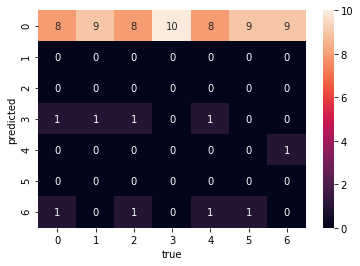

In [15]:
print(confusion_matrix(y_test, yhat))
color = 'white'
mat = confusion_matrix(y_test, yhat)

sns.heatmap(mat.T, annot=True, fmt="d")
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

**RandomForestClassifier**

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_neighbors': [5,8],
   'weights': ['uniform', 'distance'],
   'algorithm' : ['ball_tree'],
   'leaf_size' :[30, 50]
}

estimator = KNeighborsClassifier()

grid = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv = 5,
                          refit=True,
                          scoring='accuracy')

grid.fit(Xmd_train, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [30, 50],
                         'n_neighbors': [5, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [17]:
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 5,
 'weights': 'distance'}

In [18]:
from sklearn.metrics import accuracy_score, classification_report

Xmd_test = pd.DataFrame(scaler.fit_transform(X_test),columns=feature_names)
yhat = grid.predict(Xmd_test )

In [19]:
accuracy_score(y_test, yhat)

0.2

In [20]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.19      0.80      0.31        10
         1.0       0.21      0.30      0.25        10
         2.0       0.17      0.10      0.12        10
         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00        10
         5.0       1.00      0.20      0.33        10
         6.0       0.00      0.00      0.00        10

    accuracy                           0.20        70
   macro avg       0.22      0.20      0.15        70
weighted avg       0.22      0.20      0.15        70



[[8 0 1 0 0 0 1]
 [6 3 1 0 0 0 0]
 [5 2 1 1 0 0 1]
 [6 3 0 0 0 0 1]
 [6 3 1 0 0 0 0]
 [3 2 1 1 1 2 0]
 [8 1 1 0 0 0 0]]


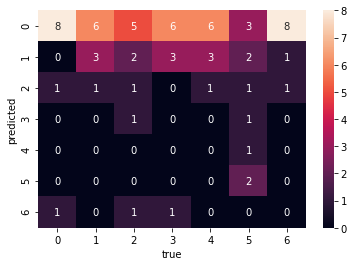

In [21]:
print(confusion_matrix(y_test, yhat))
color = 'white'
mat = confusion_matrix(y_test, yhat)

sns.heatmap(mat.T, annot=True, fmt="d")
plt.xlabel('true')
plt.ylabel('predicted')
plt.show()

We can see from the confusion matrix that none of the machine learning approaches applied to the dataset yield any fruitful results. Therefore, we will try deep learning methods on this dataset next.